# Women Employed in Computer and Mathematical Occupations in the U.S.

In this project we set out to explore answers to the following two questions concerning the trend and status of women employement in general tech-related occupations. 

* Question 1: Has the number of women being employed in computer and mathematical occupations increased during the past five years in the United States?

* Question 2: In dtailed occupations in computer and mathematical occupations, what are the occupations that have larger difference between men and women employment? what are the occupations that have smaller difference between men and women employment?

## Data scource

U.S. employment data were downloaded for the following websites for this projct. 

* Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity, 2019
https://www.bls.gov/cps/cpsaat11.htm

* Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity, 2018
https://www.bls.gov/cps/aa2018/cpsaat11.htm

* Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity, 2017
https://www.bls.gov/cps/aa2017/cpsaat11.htm

* Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity, 2016
https://www.bls.gov/cps/aa2016/cpsaat11.htm

* Employed persons by detailed occupation, sex, race, and Hispanic or Latino ethnicity, 2015
https://www.bls.gov/cps/aa2015/cpsaat11.htm



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

#read in five excel, one for each year from 2015-19
df15 = pd.read_excel('cpsaat2015.xlsx', skiprows = 6, 
                     names = ['Occupation', 'Ttl_Employed', '% Women', '% Black or African American', '% Asian', '% Hispanic or Latino'])

df16 = pd.read_excel('cpsaat2016.xlsx', skiprows = 6, 
                     names = ['Occupation', 'Ttl_Employed', '% Women', '% Black or African American', '% Asian', '% Hispanic or Latino'])

df17 = pd.read_excel('cpsaat2017.xlsx', skiprows = 6, 
                     names = ['Occupation', 'Ttl_Employed', '% Women', '% White', '% Black or African American', '% Asian', '% Hispanic or Latino'])

df18 = pd.read_excel('cpsaat2018.xlsx', skiprows = 6, 
                     names = ['Occupation', 'Ttl_Employed', '% Women', '% White', '% Black or African American', '% Asian', '% Hispanic or Latino'])

df19 = pd.read_excel('cpsaat2019.xlsx', skiprows = 6, 
                     names = ['Occupation', 'Ttl_Employed', '% Women', '% White', '% Black or African American', '% Asian', '% Hispanic or Latino'])

# show the subtotal data for computer and math jobs only 
df15tech = df15.loc[df15['Occupation'] == 'Computer and mathematical occupations']
df16tech = df16.loc[df16['Occupation'] == 'Computer and mathematical occupations']
df17tech = df17.loc[df17['Occupation'] == 'Computer and mathematical occupations']
df18tech = df18.loc[df18['Occupation'] == 'Computer and mathematical occupations']
df19tech = df19.loc[df19['Occupation'] == 'Computer and mathematical occupations']

# concat five into one dataset
df15_19 = pd.concat([df15tech, df16tech, df17tech, df18tech, df19tech], ignore_index = True)

# add a column of year and set as index
df15_19['Year'] = ['2015', '2016', '2017', '2018', '2019']
df15_19.set_index('Year', inplace = True)

# slice out the dataset that is going to be plot
df15_19 = df15_19.iloc[:,2:6]

<IPython.core.display.Javascript object>


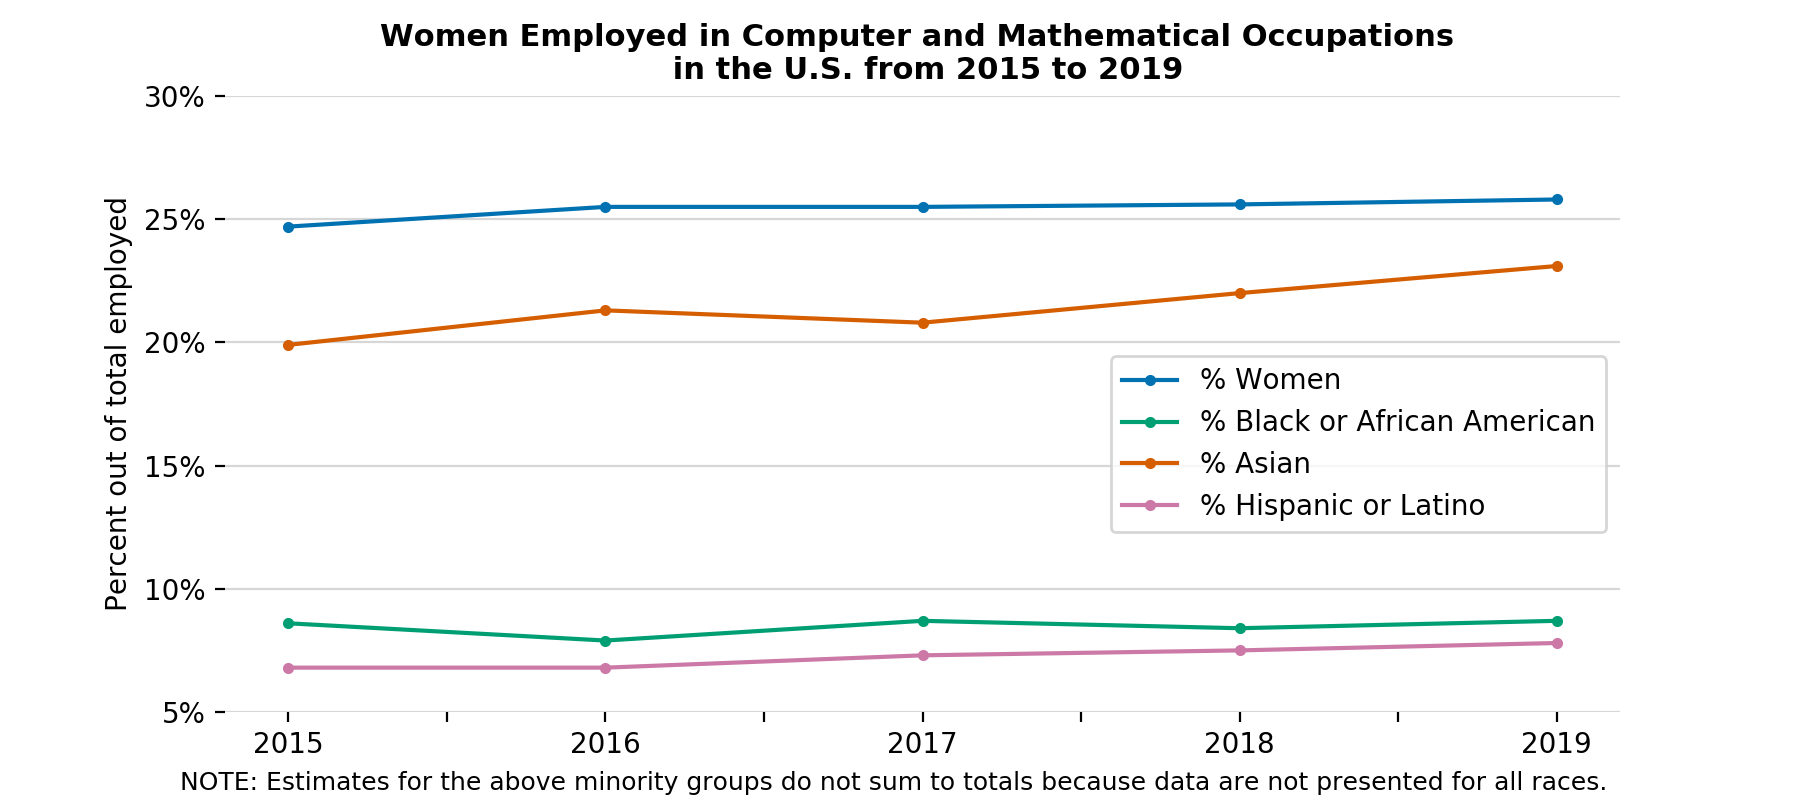

In [19]:
# line plot
plt.style.use('seaborn-colorblind')
df15_19.plot(style = '.-', figsize=(9,4))
             
plt.ylabel('Percent out of total employed')
plt.xlabel('')

plt.ylim((5, 30))
ax = plt.gca()
ax.set_title('Women Employed in Computer and Mathematical Occupations \n in the U.S. from 2015 to 2019', fontsize = 11, fontweight = 'bold')
ax.set_yticklabels(labels = [str(n)+'%' for n in range(5, 31, 5)])

# add horizontal grid
ax.grid(axis = 'y', alpha = 0.5)

# set fig frame invisible 
for spine in ax.spines.values():
    spine.set_visible(False)

# add a note
txt = 'NOTE: Estimates for the above minority groups do not sum to totals because data are not presented for all races.'
plt.gcf().text(0.1,0.012,txt, wrap = True, ha='left', fontsize = 9);

plt.legend(loc= 'best', bbox_to_anchor = (1,0.6))

plt.savefig('Women Employed in Computer and Mathematical Occupations.png')


## What the plot tells about Q1

The plot shows that the number of women being employed in computer and mathematical occupations didn't increase much during the past five years. Women comprised approximately 26% of all people employed in computer and mathematical occupations from 2016 to last year. 

Moreover, the plot shows that Asian women were the largest minority group in computer and mathematical occupations. The number of Asian women working in the computer and mathematical occupations has increased from 20% in 2015 to about 23% in 2019. Hispanic women made up about 7% of workers in computer and mathematical occupations in 2019. Black or African Amerian women made up about 9% in 2019. The number of these two minority groups didn't change much during the past five years.



<IPython.core.display.Javascript object>


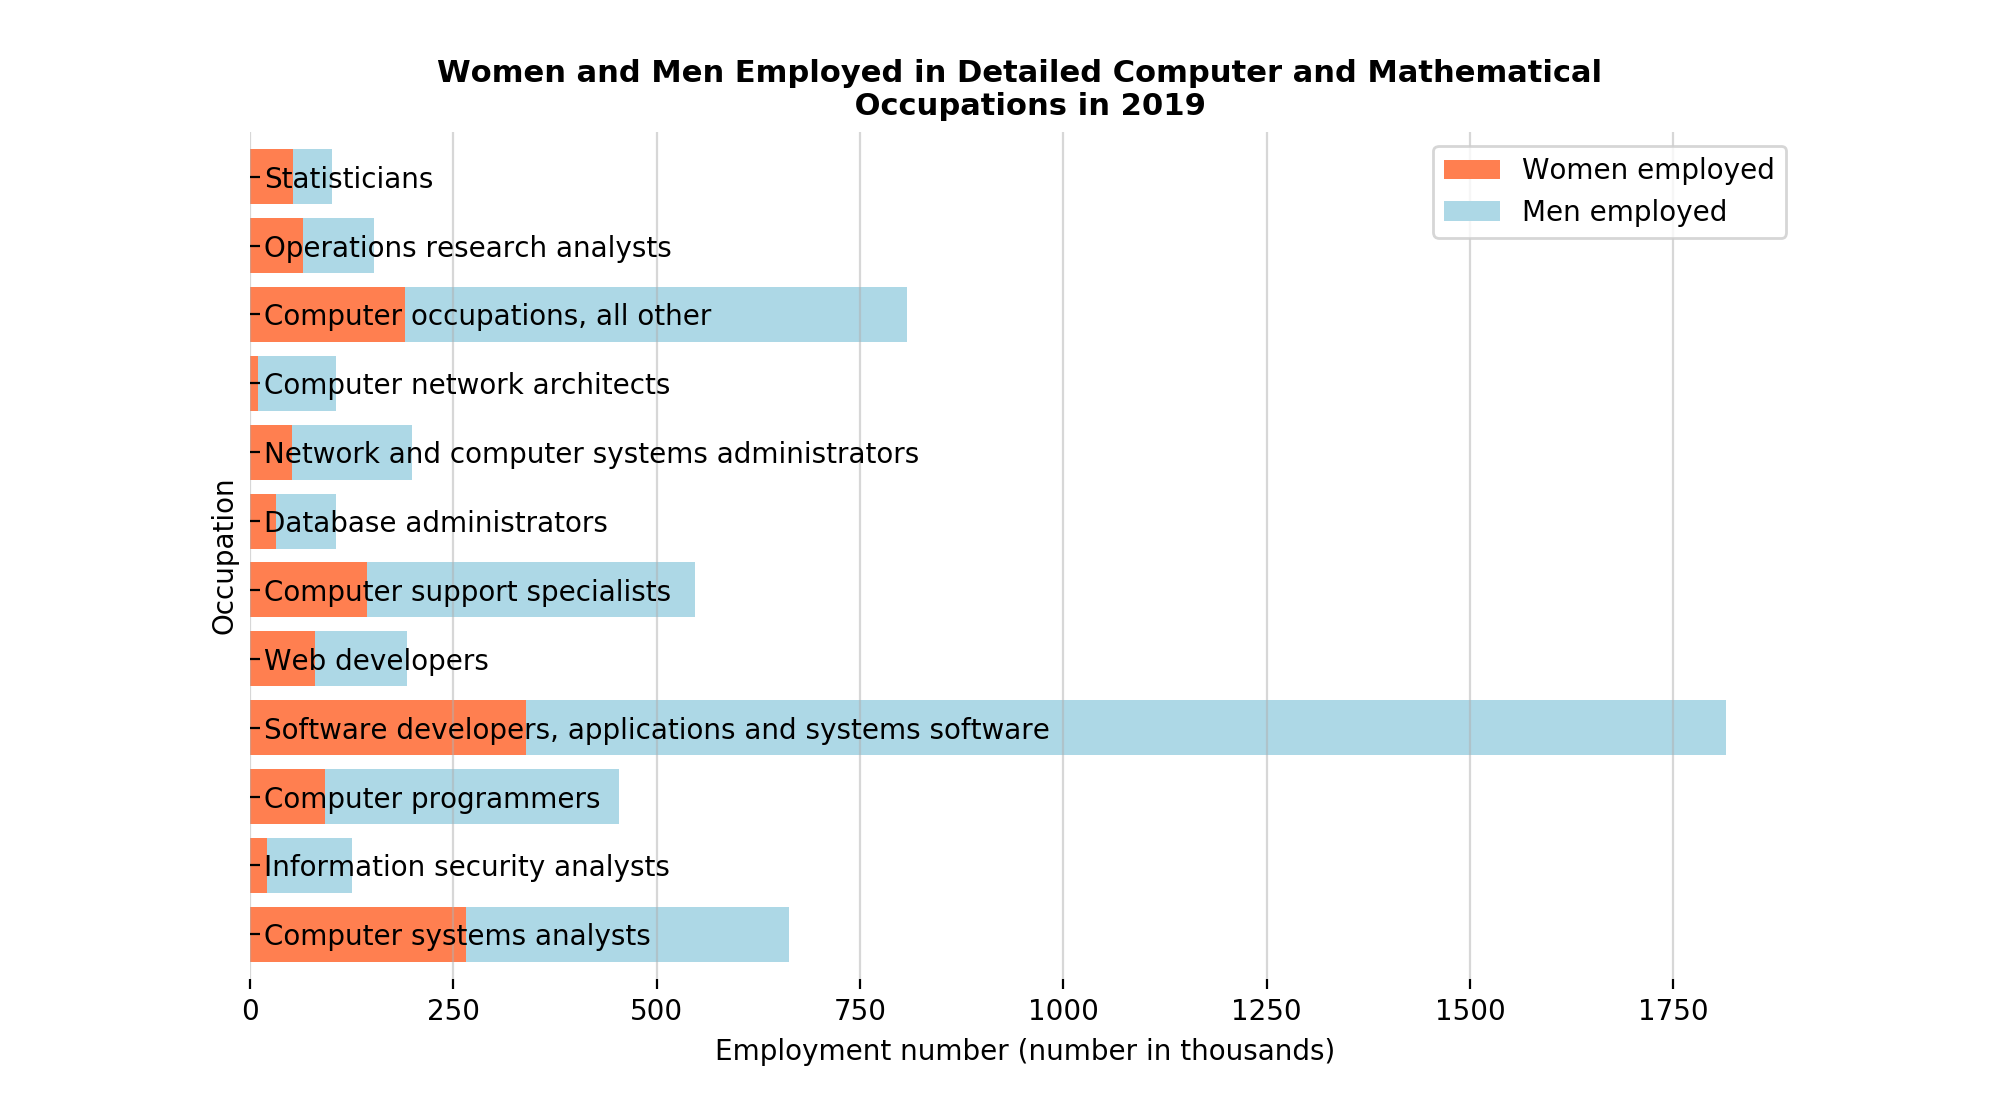

In [3]:
# a bar plot to show men and women employed in detailed occupations in computer and math in 2019
from textwrap import wrap

# slice out the infor of detailed occupations in computer and math
start = df19.index[df19['Occupation'] == 'Computer and information research scientists'].values[0]
end = df19.index[df19['Occupation'] == 'Miscellaneous mathematical science occupations'].values[0]
df19tech = df19.iloc[start:end, :]
df19tech = df19tech.drop([66,77,78]) # drop empty data

df19tech.set_index('Occupation', inplace = True)

# calculate the number of women and men employed
df19tech['Women employed'] = df19tech['Ttl_Employed'] * df19tech['% Women'] * 0.01
df19tech['Men employed'] = (100-df19tech['% Women']) * df19tech['Ttl_Employed'] * 0.01
df19tech = df19tech.loc[:, ['Women employed', 'Men employed']]

# plot
ax = df19tech.plot.barh(stacked=True, color = ['coral', 'lightblue'], figsize=(10,5.5), width = 0.8)

ytick_labels = df19tech.index.values
# wrap_ylabels = ['\n'.join(l.split(' ')) for l in ylabels]
# ax.set_yticklabels(labels = wrap_ylabels, fontsize = 9)
ax.set_yticklabels(labels = ytick_labels, horizontalalignment = "left", color = 'k')
ax.tick_params(axis="y",direction="in", pad=-5)

plt.xlabel('Employment number (number in thousands)')

ax.set_title('Women and Men Employed in Detailed Computer and Mathematical \n Occupations in 2019', fontsize = 11, fontweight= 'bold')

ax.grid(axis = 'x', alpha = 0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

## What the plot tells about Q2

The above plot showed that most women working in tech were employed as Software Developer in 2019. The occupations that had the least women employees were Computer Network Architects and Information Security Analysts. 
